In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys # Ensure the src folder is in the path
project_path = '/Users/daniela/Documents/swan/swan_model_builder_tool'
sys.path.append(project_path)

In [6]:
import yaml
config_path = f'{project_path}/experiments_specs.txt'
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

In [7]:
def create_main_directories(config):
    import os
    base_path = config['base']['path']
    output_dir = base_path + config['output']['directory']

    for folder in config['output']['data'].values():
        dir = f'{output_dir}/{folder}'
        if not os.path.isdir(dir):
            print(f'Creating file {dir}')
            os.makedirs(dir, exist_ok=True)
        else:
            print(f'{dir} already exists')
    
    for folder in config['output']['subdirectories']:
        dir = f'{output_dir}/{folder}'
        if not os.path.isdir(dir):
            print(f'Creating file {dir}')
            os.makedirs(dir, exist_ok=True)
        else:
            print(f'{dir} already exists')

In [8]:
create_main_directories(config)

/Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/DATA/WIND already exists
/Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/DATA/WAVE already exists
/Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/DATA/BATHY already exists
/Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/QGIS already exists
/Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/SWAN/01_geometry already exists
/Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/SWAN/02_bc_dbase already exists
/Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/SWAN/03_simulation already exists
/Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/SWAN/04_results already exists


In [9]:
import generate_config as gc

In [10]:
gc.main(config_path)

Configuration file generated: /Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/SWAN/CONFIG.ini


In [11]:
import create_grid as cg

In [12]:
cg.main(config_path)

Grids saved to: /Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/QGIS/swan_grids.shp


In [15]:
import build_and_run as br

In [16]:
br.main(config_path)

Checking required files:
Bathymetry: /Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/DATA/BATHY/gebco_2024_n-17.0_s-18.3_w-73.0_e-70.3.tif
Wind: /Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/DATA/WIND/wind_data_hourly_2024-12-15_2025-01-15_-73.0_-70.3_-18.3_-17.0.nc
Wave: /Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/DATA/WAVE/wave_data_hourly_2024-12-15_2025-01-15_-73.0_-70.3_-18.3_-17.0.nc
Grid: /Users/daniela/Documents/swan/swan_experiments/run_storm_event_southern_peru/QGIS/swan_grids.shp
1734220800.0
<class 'numpy.float64'>
1734220800.0
<class 'numpy.float64'>


ERROR 1: JSON parsing error: unexpected end of data (at offset 0)


In [17]:
import numpy as np
areas = np.array([model.swanGrid.getBoundary() for model in models])

NameError: name 'np' is not defined

In [87]:
import geopandas as gpd
gdf = gpd.read_file('/home/jupyter-gabriel/projects/tuflow/swan_peru_central/QGIS/QGIS_central_peru_GRIDS_000.shp')#'/home/jupyter-gabriel/projects/tuflow/swan_dbrisaro/run_storm_event_southern_peru/QGIS/swan_grids.shp')

<Axes: >

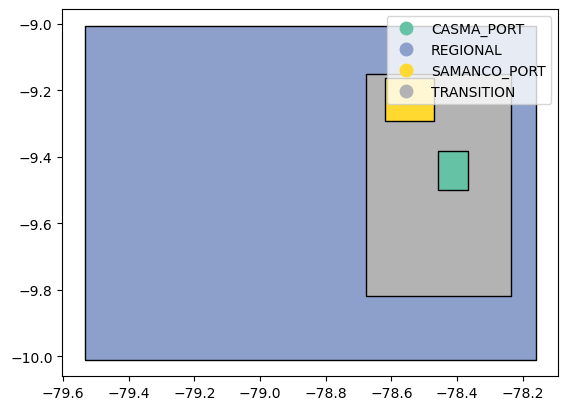

In [88]:
gdf.plot(column='Name', cmap='Set2', legend=True, edgecolor='black')

<Axes: >

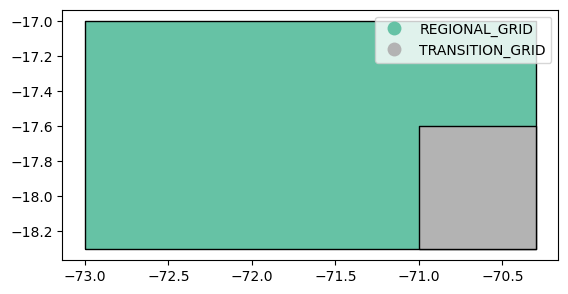

In [86]:
gdf.plot(column='Name', cmap='Set2', legend=True, edgecolor='black')

In [83]:
coords = gdf['geometry'].apply(lambda geom: list(geom.exterior.coords)[:-1])

In [84]:
points = np.array(coords[1])
polygon = np.array(coords[0])

In [85]:
inPolygon(points, polygon)

array([False,  True, False, False])

In [57]:
path = mplPath.Path(polygon)
path.contains_points(points)

array([False,  True, False, False])